# Mejores Hiperparámetros

In [1]:
import pandas as pd
df = pd.read_csv('Rforest_porteros.csv')

df.head()

,value,age,Unnamed..4_level_0_90s,Expected_PSxG.SoT,Expected_.90,Launched_Cmp.,Passes_Launch.,Passes_AvgLen,Goal.Kicks_Launch.,Goal.Kicks_AvgLen,...,Expected_PSxG.MP,Expected_PSxG....MP,Launched_Cmp.MP,Launched_Att.MP,Passes_Att.MP,Passes_Thr.MP,Goal.Kicks_Att.MP,Crosses_Opp.MP,Crosses_Stp.MP,Sweeper_.OPA.MP
0,32.0,25,27.0,0.27,0.02,27.1,35.1,33.4,58.9,49.4,...,0.907407,0.018519,2.814815,10.370370,23.666667,4.740741,3.518519,9.777778,0.592593,1.185185
1,1.5,35,19.0,0.24,-0.38,38.6,39.8,35.3,51.9,42.9,...,1.089474,-0.384211,5.421053,14.052632,26.315789,3.947368,6.894737,13.315789,0.736842,1.315789
2,3.0,32,13.0,0.27,0.13,41.9,50.3,40.8,68.0,51.3,...,0.900000,0.130769,8.307692,19.846154,29.384615,5.153846,7.461538,14.307692,0.769231,1.538462
3,13.0,24,26.0,0.26,0.17,36.5,38.5,35.9,67.4,49.2,...,1.280769,0.165385,5.076923,13.923077,24.346154,5.423077,6.730769,13.038462,1.038462,0.769231
4,3.0,29,1.0,0.36,-1.22,50.0,12.0,23.1,16.7,33.3,...,1.800000,-1.200000,2.000000,4.000000,25.000000,4.000000,6.000000,7.000000,0.000000,2.000000


In [2]:
# Búsqueda del mejor valor de cantidad de árboles, ajustado a la profundidad óptima encontrada (4)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px



seed = 123

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['value']), df['value'], test_size=0.2, random_state=seed)


maxdepth_list = []
min_samples_list = []
nestimator_list = []
max_leaf_nodes_list = []
MAPE_test_list = []
MAE_CV_list = []

max_depth = [5, 10, 15]
min_samples_split = [2, 5, 10, 20]
max_leaf_nodes = [5, 10, 20, 30]
estimators = [50, 100, 200, 300]

for maxdepth in max_depth:
  for n_estimators in estimators:
    for samples in min_samples_split:
      for leaf_nodes in max_leaf_nodes:
        rf_model = RandomForestRegressor(random_state=seed, max_depth=maxdepth, n_estimators=n_estimators, min_samples_split=samples, max_leaf_nodes = leaf_nodes)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        #cross validation CV = 3 / SCORE = MAE
        scores = cross_val_score(rf_model, X_train, y_train, cv=3,scoring='neg_mean_absolute_error')
        mae_scores = -scores

        ## Generación de listas
        maxdepth_list.append(maxdepth)
        nestimator_list.append(n_estimators)
        min_samples_list.append(samples)
        max_leaf_nodes_list.append(leaf_nodes)
        MAPE_test_list.append(mean_absolute_percentage_error(y_test,y_pred))
        MAE_CV_list.append(mae_scores.mean()) # MAE

        df_grid = pd.DataFrame({"maxdepth":maxdepth_list,
                          "n_estimators":nestimator_list,
                           "min_samples":min_samples_list,
                           "max_leaf_nodes":max_leaf_nodes_list,
                           "MAPE_test":MAPE_test_list,
                            "MAE_CV":MAE_CV_list})

fig = px.scatter_3d(df_grid, x='MAE_CV', y='max_leaf_nodes', z='maxdepth', color='min_samples', size='n_estimators')
fig.update_layout(
    title="Hyperparameter tuning (Porteros)",
    autosize=True, width=900, height=900,
    margin = dict(l=65, r=50, b=65, t=90))
fig.show()
min_mae = df_grid["MAE_CV"].idxmin()
print('Los hiperparámetros ajustados al mínimo MAE son:')
print(df_grid.loc[min_mae])

Los hiperparámetros ajustados al mínimo MAE son:
maxdepth           5.000000
n_estimators      50.000000
min_samples        5.000000
max_leaf_nodes     5.000000
MAPE_test          4.051583
MAE_CV             6.869030
Name: 4, dtype: float64


In [3]:
fig = px.scatter(df_grid, x="MAE_CV", y="max_leaf_nodes", color="maxdepth",
                 size='min_samples', symbol = 'n_estimators')

fig.update_layout(
    title="Hyperparameter tuning (Porteros)",
    autosize=True,
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90),
    legend=dict(orientation="h", x=0.5, y=1.1),
    xaxis_title="Mean Absolute Error (CV)",
    yaxis_title="Max Leaf Nodes",
    coloraxis_colorbar_title="Max Depth",
    showlegend=True
)

fig.show()

# Mejor Modelo

In [4]:
# Mejores hiperparámetros
best_params_x = {
    'max_depth': 5,
    'max_leaf_nodes': 5,
    'min_samples_split': 5,
    'n_estimators': 50
}

# Crear el mejor modelo
best_rf_model= RandomForestRegressor(random_state=123, **best_params_x)

# Ajustar el modelo a los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Calcular el MAE para los datos de entrenamiento
y_pred_train = best_rf_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calcular el MAE para los datos de prueba
y_pred_test = best_rf_model.predict(X_test)
mae_test= mean_absolute_error(y_test, y_pred_test)

# Calcular el MAPE para los datos de entrenamiento y prueba
mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100  # Multiplicado por 100 para convertirlo a porcentaje
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100  # Multiplicado por 100 para convertirlo a porcentaje

# Imprimir el MAE y el MAPE para la Iteración 2

print(f"MAE de entrenamiento: {mae_train}")
print(f"MAE de prueba: {mae_test}")
print(f"MAPE de entrenamiento (%): {mape_train}")
print(f"MAPE de prueba (%): {mape_test}")

MAE de entrenamiento: 4.6537818197544745
MAE de prueba: 5.407475995926856
MAPE de entrenamiento (%): 309.42471510528173
MAPE de prueba (%): 405.1582809672016


# Importancia de las Variables

In [5]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.3 MB/s eta 0:00:00


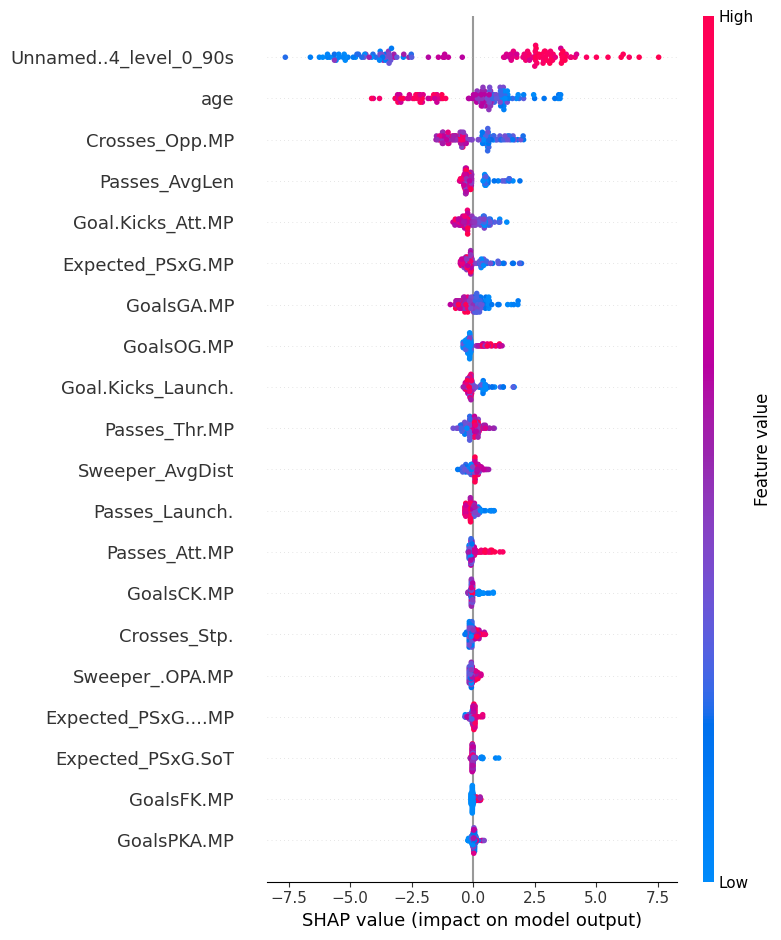

In [6]:
# Importa la biblioteca SHAP
import shap

# Crear un objeto explicador SHAP con el mejor modelo
explainer = shap.Explainer(best_rf_model)

# Calcular los valores SHAP para el conjunto de entrenamiento
shap_values = explainer.shap_values(X_train)

# Graficar un resumen de los valores SHAP
shap.summary_plot(shap_values, X_train)

# Predicciones

In [7]:
predicciones = best_rf_model.predict(df.drop(columns=['value']))
df['value_pred'] = predicciones
df.head()

,value,age,Unnamed..4_level_0_90s,Expected_PSxG.SoT,Expected_.90,Launched_Cmp.,Passes_Launch.,Passes_AvgLen,Goal.Kicks_Launch.,Goal.Kicks_AvgLen,...,Expected_PSxG....MP,Launched_Cmp.MP,Launched_Att.MP,Passes_Att.MP,Passes_Thr.MP,Goal.Kicks_Att.MP,Crosses_Opp.MP,Crosses_Stp.MP,Sweeper_.OPA.MP,value_pred
0,32.0,25,27.0,0.27,0.02,27.1,35.1,33.4,58.9,49.4,...,0.018519,2.814815,10.370370,23.666667,4.740741,3.518519,9.777778,0.592593,1.185185,23.462843
1,1.5,35,19.0,0.24,-0.38,38.6,39.8,35.3,51.9,42.9,...,-0.384211,5.421053,14.052632,26.315789,3.947368,6.894737,13.315789,0.736842,1.315789,5.205242
2,3.0,32,13.0,0.27,0.13,41.9,50.3,40.8,68.0,51.3,...,0.130769,8.307692,19.846154,29.384615,5.153846,7.461538,14.307692,0.769231,1.538462,3.317871
3,13.0,24,26.0,0.26,0.17,36.5,38.5,35.9,67.4,49.2,...,0.165385,5.076923,13.923077,24.346154,5.423077,6.730769,13.038462,1.038462,0.769231,10.856928
4,3.0,29,1.0,0.36,-1.22,50.0,12.0,23.1,16.7,33.3,...,-1.200000,2.000000,4.000000,25.000000,4.000000,6.000000,7.000000,0.000000,2.000000,3.769954


# Jugadores sobre / sub valorados

In [8]:
df['diferencia'] = df['value_pred']-df['value']

df['valorizacion'] = np.where(df['diferencia']>11,'Subvalorado',np.where(df['diferencia']<-11,'Sobrevalorado',''))
df.head(50)
#df[df['valorizacion'] == 'Sobrevalorado'].count()


,value,age,Unnamed..4_level_0_90s,Expected_PSxG.SoT,Expected_.90,Launched_Cmp.,Passes_Launch.,Passes_AvgLen,Goal.Kicks_Launch.,Goal.Kicks_AvgLen,...,Launched_Att.MP,Passes_Att.MP,Passes_Thr.MP,Goal.Kicks_Att.MP,Crosses_Opp.MP,Crosses_Stp.MP,Sweeper_.OPA.MP,value_pred,diferencia,valorizacion
0,32.000,25,27.0,0.270,0.020,27.10,35.10,33.4,58.9,49.4,...,10.370370,23.666667,4.740741,3.518519,9.777778,0.592593,1.185185,23.462843,-8.537157,
1,1.500,35,19.0,0.240,-0.380,38.60,39.80,35.3,51.9,42.9,...,14.052632,26.315789,3.947368,6.894737,13.315789,0.736842,1.315789,5.205242,3.705242,
2,3.000,32,13.0,0.270,0.130,41.90,50.30,40.8,68.0,51.3,...,19.846154,29.384615,5.153846,7.461538,14.307692,0.769231,1.538462,3.317871,0.317871,
3,13.000,24,26.0,0.260,0.170,36.50,38.50,35.9,67.4,49.2,...,13.923077,24.346154,5.423077,6.730769,13.038462,1.038462,0.769231,10.856928,-2.143072,
4,3.000,29,1.0,0.360,-1.220,50.00,12.00,23.1,16.7,33.3,...,4.000000,25.000000,4.000000,6.000000,7.000000,0.000000,2.000000,3.769954,0.769954,
5,18.000,26,25.0,0.260,0.080,36.40,15.50,26.6,17.4,26.4,...,4.400000,21.720000,3.600000,5.960000,10.240000,0.320000,1.000000,23.039210,5.039210,
6,25.000,28,25.0,0.220,-0.050,43.70,38.50,35.3,64.9,52.0,...,14.840000,28.600000,3.680000,5.920000,12.160000,0.320000,1.080000,18.979264,-6.020736,
7,1.000,32,6.0,0.240,-0.710,40.00,17.30,28.0,27.0,33.2,...,7.500000,33.666667,4.000000,6.166667,9.666667,1.000000,2.500000,3.156275,2.156275,
8,8.000,27,27.0,0.230,-0.090,45.30,32.50,32.4,64.2,46.0,...,11.370370,21.888889,5.074074,6.629630,11.481481,0.851852,0.851852,15.329748,7.329748,
9,0.900,31,17.0,0.300,-0.460,41.70,45.90,38.0,75.9,56.4,...,19.470588,29.470588,3.470588,7.823529,15.117647,0.352941,1.176471,4.696084,3.796084,


# Gráfico comparativo valor real vs predicción

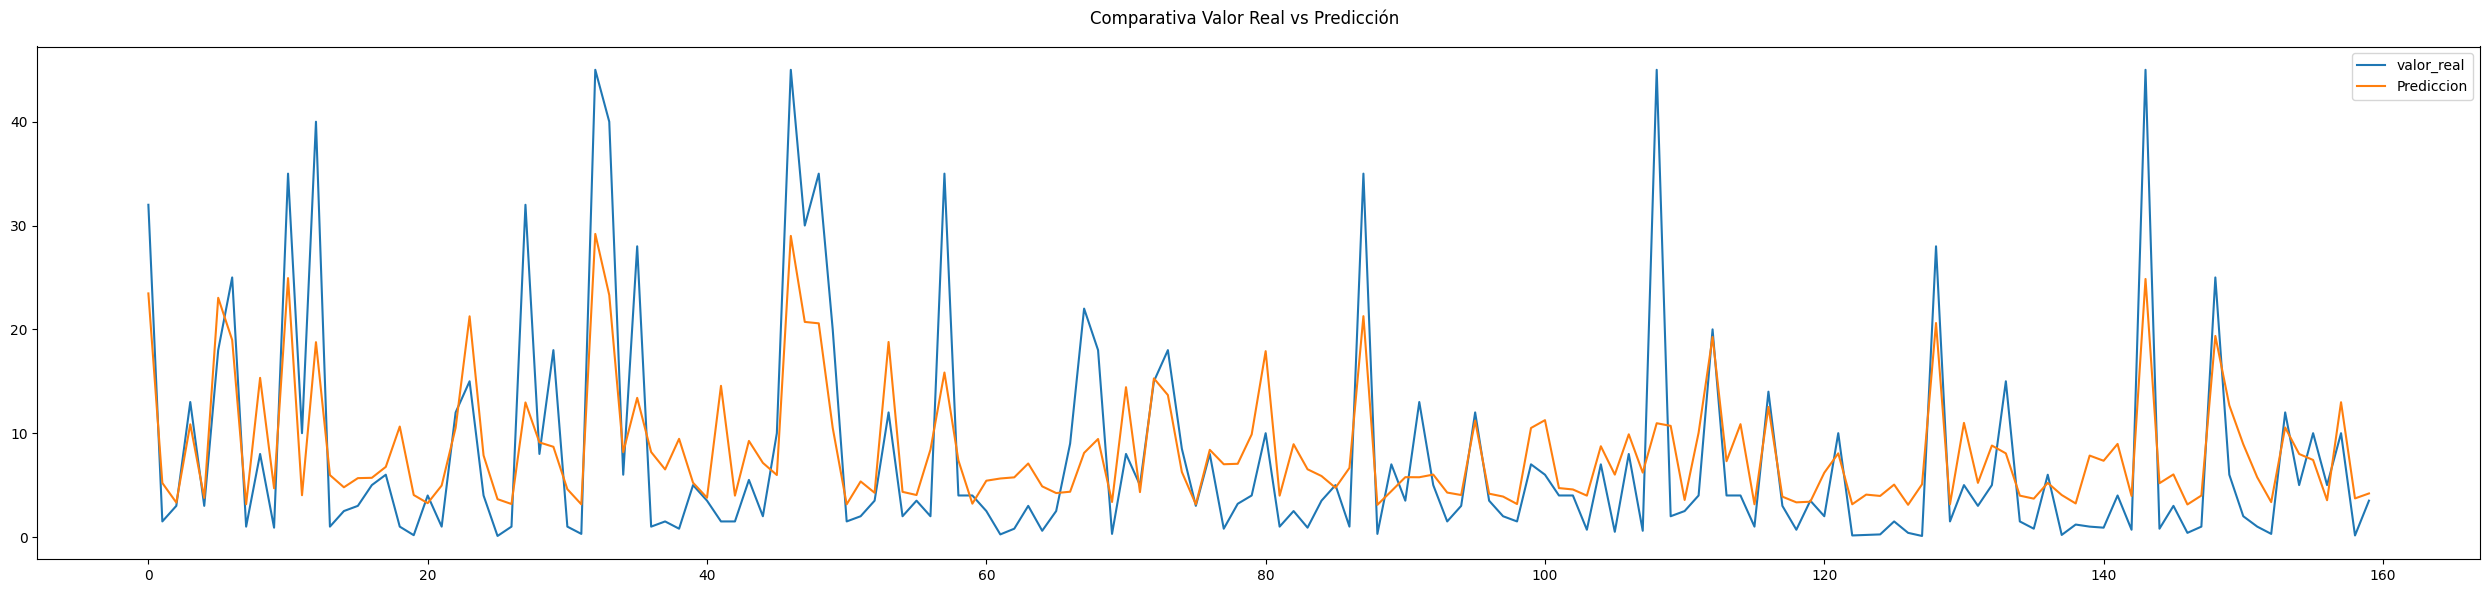

In [9]:
plt.figure(figsize=(25, 6))
df["value"].plot(label="valor_real")
df["value_pred"].plot(label="Prediccion")

plt.suptitle("Comparativa Valor Real vs Predicción")
plt.legend()
plt.tight_layout()
plt.show();

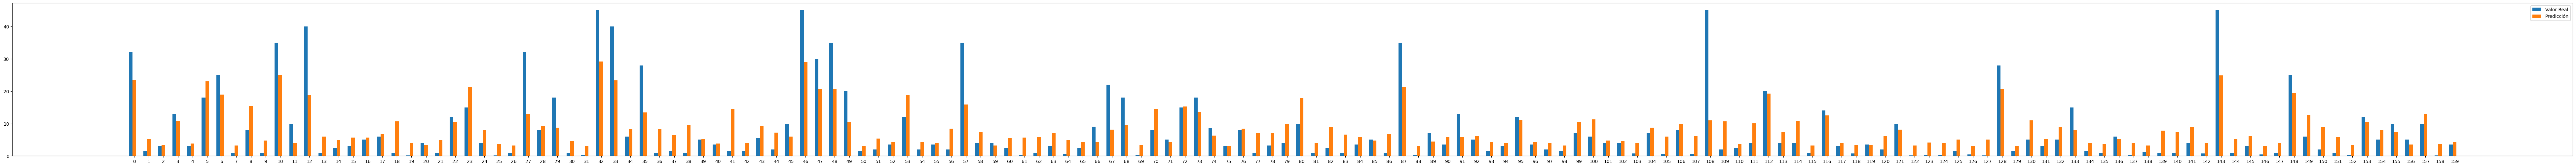

In [10]:
import numpy as np

n = len(df.index)
x = np.arange(n)
width = 0.25
plt.figure(figsize=(100, 6))
plt.bar(x - width, df.value, width=width, label='Valor Real')
plt.bar(x, df.value_pred, width=width, label='Predicción')
plt.xticks(x, df.index)
plt.legend(loc='best')
plt.show()